In [115]:
from pathlib import Path
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import librosa as lib
import librosa.display
import IPython.display
import soundfile
import numpy as np

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1) Work with data


create set of emo.

In [32]:
PATH = Path('/content/drive/MyDrive/Crema')
filespath = list(PATH.glob(r'**/*.wav'))
emo_labels = list(map(lambda x: os.path.split(x)[1].split('_')[2], filespath))
set(emo_labels)

{'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'}

create dataframe of wav files paths and labels


In [52]:
audio_features = []
files_path = pd.Series(filespath , name='.wav_path').astype(str)
labels = pd.Series(emo_labels , name='labels')

for audios in files_path:
    audio , sample_rate = lib.load(audios)
    audio_features.append(audio)

audio_features = pd.Series(audio_features , name='features')
data = pd.concat([files_path,audio_features,labels] , axis=1)

Play audio and plot wave for each class


In [127]:
import IPython
def play_and_plot():
  sad_audios = data[data['labels'] == 'SAD']['.wav_path']
  sad_feature =  data[data['labels'] == 'SAD']['features']
  librosa.display.waveplot(sad_feature.iloc[0])
  IPython.display.Audio(sad_audios.iloc[0])

  happy_audios = data[data['labels'] == 'HAP']['.wav_path']
  happy_featire = data[data['labels'] == 'HAP']['features']
  librosa.display.waveplot(happy_featire.iloc[0])
  IPython.display.Audio(happy_audios.iloc[0])

  angry_audios = data[data['labels'] == 'ANG']['.wav_path']
  angry_feature = data[data['labels'] == 'ANG']['features']
  librosa.display.waveplot(angry_feature.iloc[0])
  IPython.display.Audio(angry_audios.iloc[0])


  neutral_audios = data[data['labels'] == 'NEU']['.wav_path']
  neutral_feature = data[data['labels'] == 'NEU']['features']
  librosa.display.waveplot(neutral_feature.iloc[0])
  IPython.display.Audio(neutral_audios.iloc[0])


  fear_audios = data[data['labels'] == 'FEA']['.wav_path']
  fear_feature = data[data['labels'] == 'FEA']['features']
  librosa.display.waveplot(fear_feature.iloc[0])
  IPython.display.Audio(fear_audios.iloc[0])


  dis_audios = data[data['labels'] == 'DIS']['.wav_path']
  dis_feature = data[data['labels'] == 'DIS']['features']
  librosa.display.waveplot(dis_feature.iloc[0])
  IPython.display.Audio(dis_audios.iloc[0])


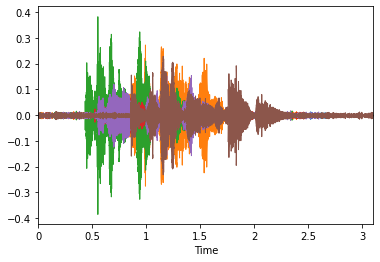

In [128]:
play_and_plot()